In [85]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
df = pd.read_csv("/content/churn_prediction.csv")

In [87]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [88]:
df.dtypes

,0
customer_id,int64
vintage,int64
age,int64
gender,object
dependents,float64
occupation,object
city,float64
customer_nw_category,int64
branch_code,int64
current_balance,float64


Data Cleaning

In [89]:
#checking for the missing values
df.isnull().sum()

,0
customer_id,0
vintage,0
age,0
gender,525
dependents,2463
occupation,80
city,803
customer_nw_category,0
branch_code,0
current_balance,0


In [90]:
# Removing duplicate rows
df.drop_duplicates(inplace=True)

In [91]:
#Categories gender, dependents, occupation and city have missing values.Drop those rows
df=df.dropna()

In [92]:
#check after droping
df.isnull().sum()

,0
customer_id,0
vintage,0
age,0
gender,0
dependents,0
occupation,0
city,0
customer_nw_category,0
branch_code,0
current_balance,0


Data Analysis

In [93]:
churn_counts = df['churn'].value_counts()

print(churn_counts)

churn
0    20314
1     4518
Name: count, dtype: int64


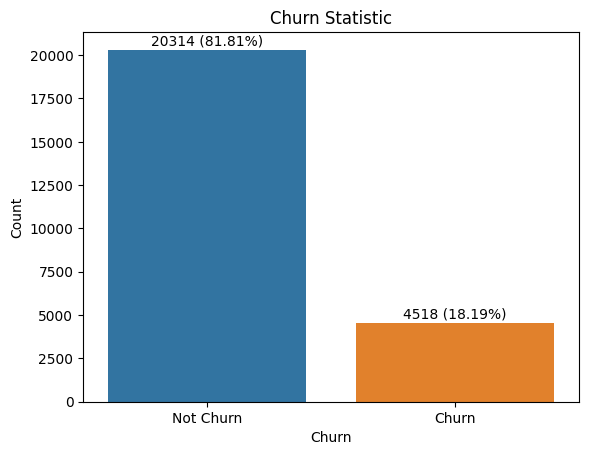

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate churn counts and total samples
churn_counts = df['churn'].value_counts()
total_samples = len(df['churn'])

# Create a new DataFrame for plotting
churn_df = churn_counts.reset_index()
churn_df.columns = ['churn', 'count']

# Create the bar plot with distinct colors and using hue
sns.barplot(data=churn_df, x='churn', y='count', hue='churn', palette=['#1f77b4', '#ff7f0e'], dodge=False)
plt.legend([], [], frameon=False)  # Remove legend
plt.title('Churn Statistic')
plt.xlabel('Churn')
plt.ylabel('Count')

# Annotate the bars with counts and percentages
for index, value in enumerate(churn_counts):
    plt.text(index, value + 100, f'{value} ({value / total_samples * 100:.2f}%)', ha='center', va='bottom')

# Set x-axis labels
plt.xticks(ticks=[0, 1], labels=['Not Churn', 'Churn'])
plt.show()

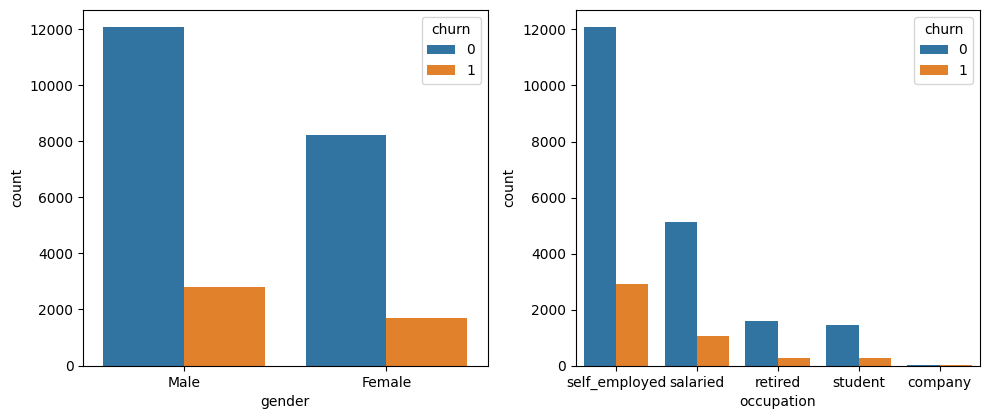

In [95]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.countplot(x='gender', hue= 'churn', data = df)
plt.subplot(2,2,2)
sns.countplot(x = 'occupation', hue = 'churn', data = df)
plt.tight_layout()
plt.show()

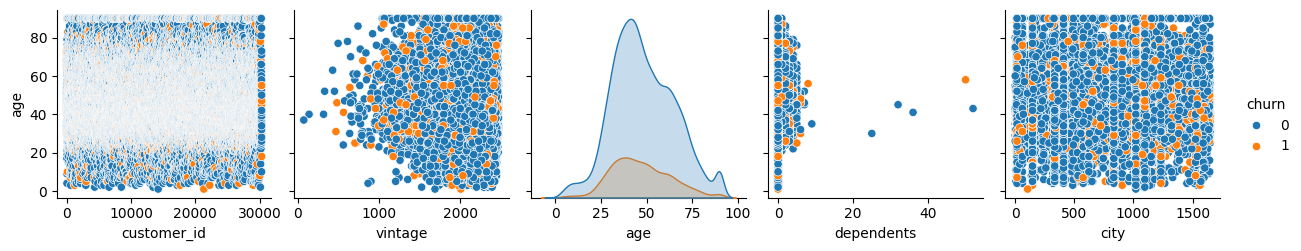

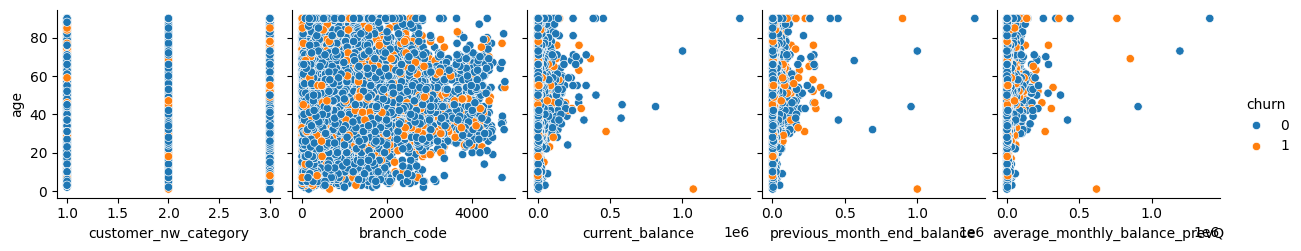

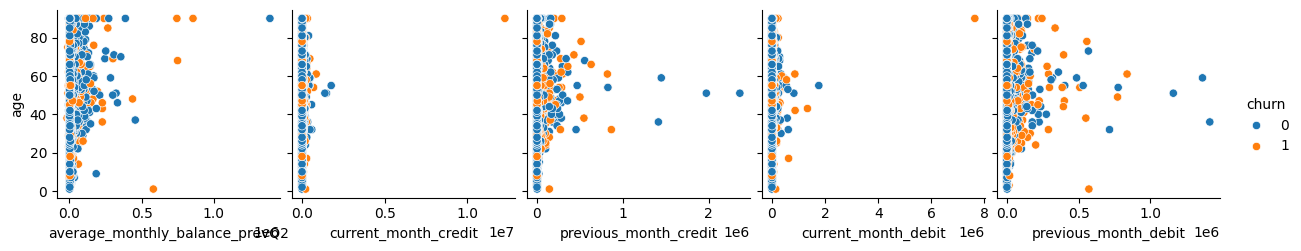

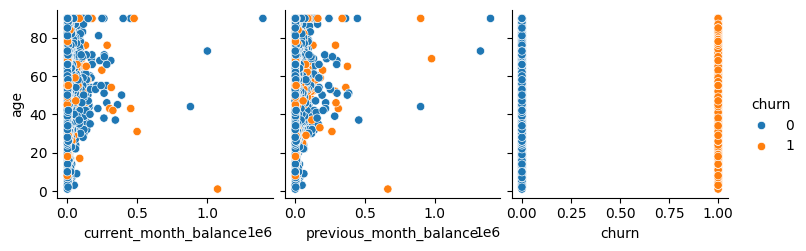

In [96]:
df[['customer_nw_category','churn']]= df[['customer_nw_category','churn']].astype('int')
numeric_columns = df.select_dtypes(include = 'number')
for i  in range(0,len(numeric_columns.columns),5):
    sns.pairplot(data = numeric_columns,hue = 'churn',
                x_vars = numeric_columns.columns[i:i+5],
                y_vars = ['age'])

Data Preprocessing and Splitting the data into Train&Test

In [97]:
#Identifying Numerical and Categorical Columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

#One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

from sklearn.model_selection import train_test_split

#Feature and Target Split
X = df.drop(columns=['churn'])
y = df['churn']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model-1 Logistic Regression

Accuracy: 0.84
Confusion Matrix:
[[4108   30]
 [ 762   67]]


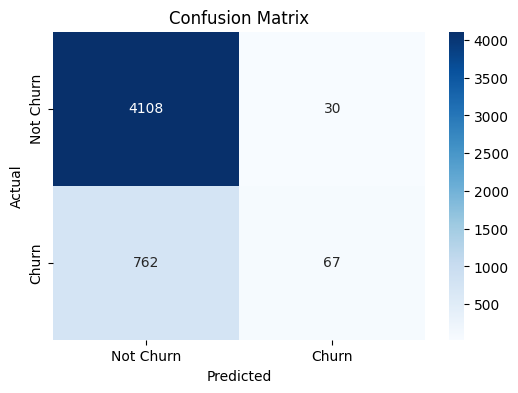


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      4138
           1       0.69      0.08      0.14       829

    accuracy                           0.84      4967
   macro avg       0.77      0.54      0.53      4967
weighted avg       0.82      0.84      0.78      4967

ROC-AUC Score: 0.74


In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the logistic regression model with more iterations
logistic_model = LogisticRegression(max_iter=1000)

# Fit the model
logistic_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate and print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print ROC-AUC score
roc_auc = roc_auc_score(y_test, logistic_model.predict_proba(X_test_scaled)[:, 1])
print(f"ROC-AUC Score: {roc_auc:.2f}")


Model-2 KNN

Accuracy: 0.80
Confusion Matrix:
[[3946  192]
 [ 786   43]]


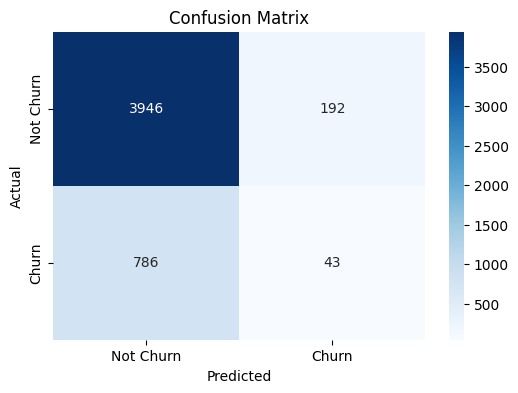


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4138
           1       0.18      0.05      0.08       829

    accuracy                           0.80      4967
   macro avg       0.51      0.50      0.49      4967
weighted avg       0.73      0.80      0.75      4967

ROC-AUC Score: 0.53


In [99]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier (k=5 is a common default)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model
knn_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate and print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print ROC-AUC score
roc_auc = roc_auc_score(y_test, knn_model.predict_proba(X_test_scaled)[:, 1])
print(f"ROC-AUC Score: {roc_auc:.2f}")


Model-3 Random Forest

Accuracy: 0.87
Confusion Matrix:
[[4034  104]
 [ 525  304]]


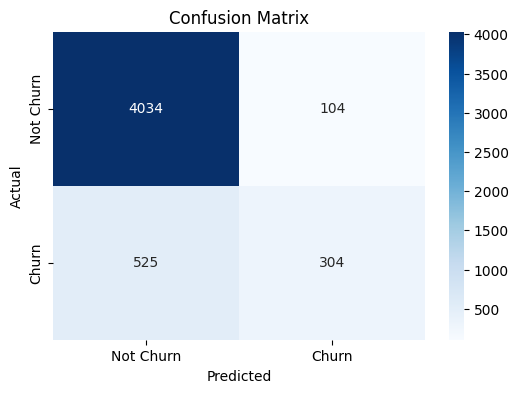


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.93      4138
           1       0.75      0.37      0.49       829

    accuracy                           0.87      4967
   macro avg       0.81      0.67      0.71      4967
weighted avg       0.86      0.87      0.85      4967

ROC-AUC Score: 0.84


In [100]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate and print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print ROC-AUC score
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
print(f"ROC-AUC Score: {roc_auc:.2f}")


Model-4 Decision Tree

Accuracy: 0.81
Confusion Matrix:
[[3608  530]
 [ 431  398]]


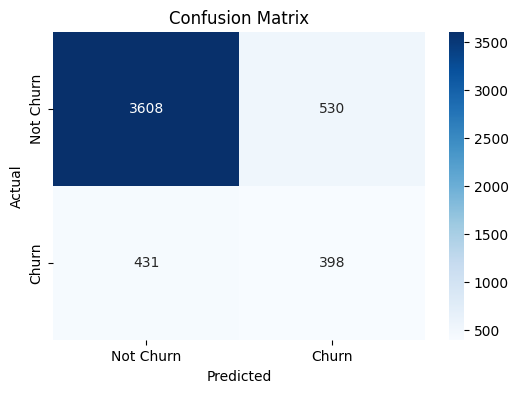


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4138
           1       0.43      0.48      0.45       829

    accuracy                           0.81      4967
   macro avg       0.66      0.68      0.67      4967
weighted avg       0.82      0.81      0.81      4967

ROC-AUC Score: 0.68


In [101]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model
dt_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = dt_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate and print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Calculate and print ROC-AUC score
roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test_scaled)[:, 1])
print(f"ROC-AUC Score: {roc_auc:.2f}")


Compare All the Models

Model Comparison:
  Model  Accuracy  Precision  Recall  F1 Score  ROC-AUC
0    LR      0.84       0.69    0.08      0.14     0.74
1   KNN      0.80       0.18    0.05      0.08     0.53
2    RF      0.87       0.75    0.37      0.49     0.84
3    DT      0.81       0.43    0.48      0.45     0.68


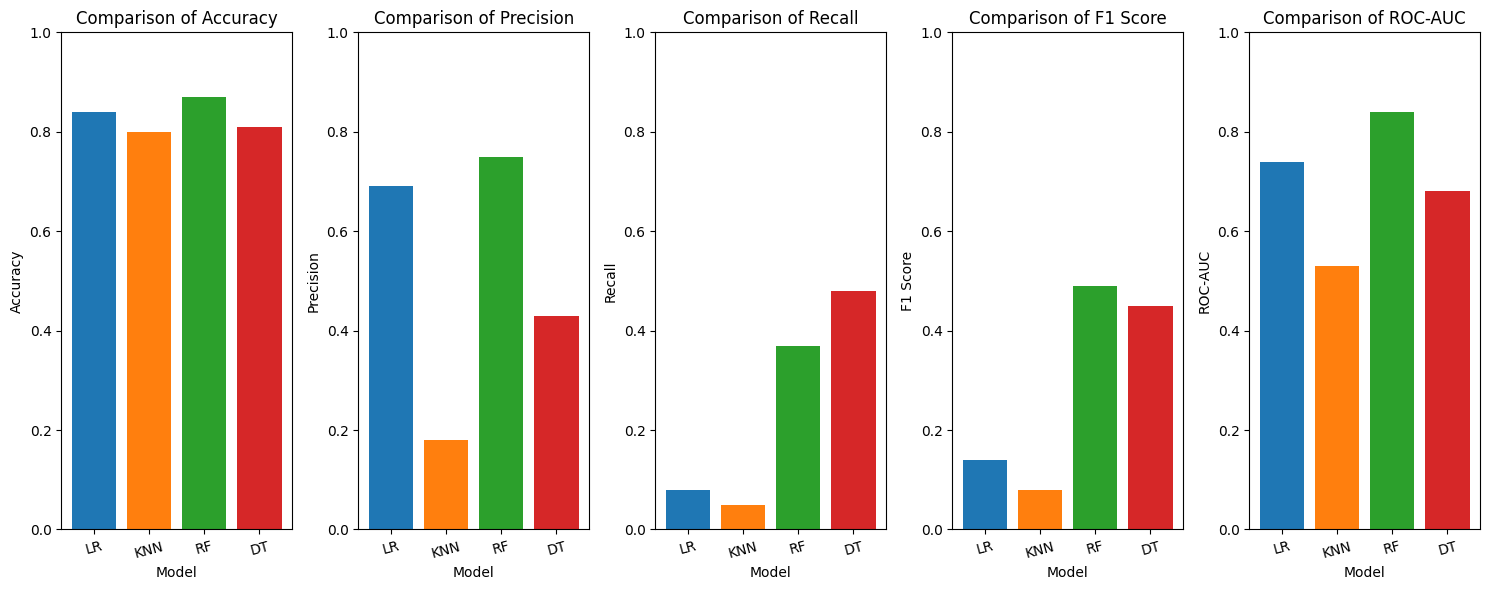

In [102]:
results = {
    'Model': ['LR', 'KNN', 'RF', 'DT'],
    'Accuracy': [0.84, 0.80, 0.87, 0.81],
    'Precision': [0.69, 0.18, 0.75, 0.43],
    'Recall': [0.08, 0.05, 0.37, 0.48],
    'F1 Score': [0.14, 0.08, 0.49, 0.45],
    'ROC-AUC': [0.74, 0.53, 0.84, 0.68]
}

# Create a DataFrame
results_df = pd.DataFrame(results)

# Display the comparison table
print("Model Comparison:")
print(results_df)

# Set figure size for the comparison
plt.figure(figsize=(15, 6))

# Plot Accuracy, Precision, Recall, F1 Score, and ROC-AUC
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']

# Create a bar plot for each metric
for i, metric in enumerate(metrics):
    plt.subplot(1, 5, i + 1)  # 1 row, 5 columns
    plt.bar(results_df['Model'], results_df[metric], color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
    plt.title(f'Comparison of {metric}')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.ylim(0, 1)  # Set y-axis limit to [0, 1] for better comparison
    plt.xticks(rotation=15)

plt.tight_layout()
plt.show()
